In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# GeoJSON 파일 불러오기
geojson_file = 'HangJeongDong_ver20230401.geojson'
geo_data = gpd.read_file(geojson_file)

# 'sidonm' 열이 '서울특별시'인 데이터만 선택
seoul_geo_data = geo_data[geo_data['sidonm'] == '서울특별시']

# 동 단위로 데이터 그룹화
grouped_data = seoul_geo_data.dissolve(by='temp', aggfunc='sum')

# 'temp' 열을 복원하여 다시 추가합니다.
grouped_data['temp'] = grouped_data.index

# 'temp' 열의 값을 수정하여 구 부분을 없앱니다.
grouped_data['temp1'] = grouped_data['temp'].apply(lambda x: ' '.join(x.split()[1:]))

# 결과 출력
grouped_data

,geometry,OBJECTID,temp,temp1
temp,,,,
강남구 개포1동,"POLYGON ((127.07641 37.48370, 127.07589 37.482...",369,강남구 개포1동,개포1동
강남구 개포2동,"POLYGON ((127.07745 37.48712, 127.07641 37.483...",379,강남구 개포2동,개포2동
강남구 개포3동,"POLYGON ((127.08363 37.49926, 127.09047 37.497...",373,강남구 개포3동,개포3동
강남구 개포4동,"POLYGON ((127.06253 37.47284, 127.06228 37.470...",370,강남구 개포4동,개포4동
강남구 논현1동,"POLYGON ((127.03389 37.50739, 127.02447 37.504...",359,강남구 논현1동,논현1동
...,...,...,...,...
중랑구 상봉2동,"POLYGON ((127.09320 37.59415, 127.08787 37.593...",100,중랑구 상봉2동,상봉2동
중랑구 신내1동,"POLYGON ((127.11567 37.61929, 127.11697 37.617...",106,중랑구 신내1동,신내1동
중랑구 신내2동,"POLYGON ((127.09580 37.60061, 127.09574 37.600...",107,중랑구 신내2동,신내2동


In [2]:
import pandas as pd

# 'temp' 열의 값을 수정하여 구 부분을 없앱니다.
grouped_data['temp'] = grouped_data['temp'].apply(lambda x: ' '.join(x.split()[1:]))

# 결과 출력
grouped_data

,geometry,OBJECTID,temp,temp1
temp,,,,
강남구 개포1동,"POLYGON ((127.07641 37.48370, 127.07589 37.482...",369,개포1동,개포1동
강남구 개포2동,"POLYGON ((127.07745 37.48712, 127.07641 37.483...",379,개포2동,개포2동
강남구 개포3동,"POLYGON ((127.08363 37.49926, 127.09047 37.497...",373,개포3동,개포3동
강남구 개포4동,"POLYGON ((127.06253 37.47284, 127.06228 37.470...",370,개포4동,개포4동
강남구 논현1동,"POLYGON ((127.03389 37.50739, 127.02447 37.504...",359,논현1동,논현1동
...,...,...,...,...
중랑구 상봉2동,"POLYGON ((127.09320 37.59415, 127.08787 37.593...",100,상봉2동,상봉2동
중랑구 신내1동,"POLYGON ((127.11567 37.61929, 127.11697 37.617...",106,신내1동,신내1동
중랑구 신내2동,"POLYGON ((127.09580 37.60061, 127.09574 37.600...",107,신내2동,신내2동


In [4]:
# 내가씀.csv 파일 불러오기
csv_file = '동인구수.csv'
population_data = pd.read_csv(csv_file, encoding='euc-kr')

# 데이터 병합
merged_data = grouped_data.merge(population_data, left_on='temp1', right_on='동',how='outer')
merged_data

,geometry,OBJECTID,temp,temp1,동,총인구수
0,"POLYGON ((127.07641 37.48370, 127.07589 37.482...",369.0,개포1동,개포1동,개포1동,6922.0
1,"POLYGON ((127.07745 37.48712, 127.07641 37.483...",379.0,개포2동,개포2동,개포2동,29032.0
2,"POLYGON ((127.08363 37.49926, 127.09047 37.497...",373.0,개포3동,개포3동,개포3동,17382.0
3,"POLYGON ((127.06253 37.47284, 127.06228 37.470...",370.0,개포4동,개포4동,개포4동,23639.0
4,"POLYGON ((127.03389 37.50739, 127.02447 37.504...",359.0,논현1동,논현1동,논현1동,22080.0
...,...,...,...,...,...,...
432,None,NaN,NaN,NaN,상계3.4동,25324.0
433,None,NaN,NaN,NaN,상계6.7동,32044.0
434,None,NaN,NaN,NaN,중계2.3동,33497.0
435,None,NaN,NaN,NaN,상일1동,39178.0


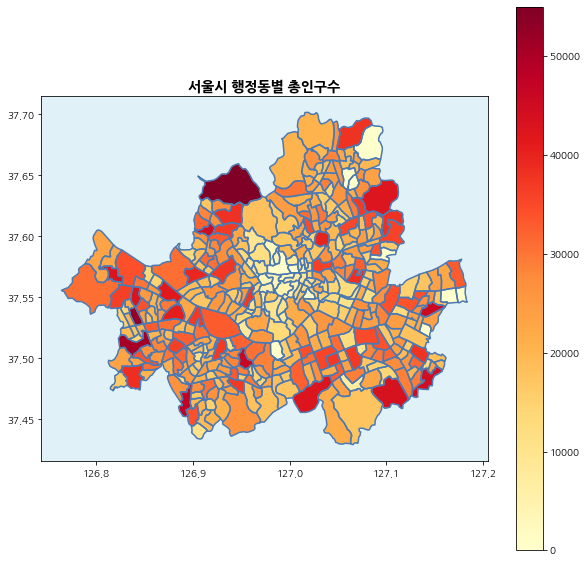

In [5]:

# NaN 값을 0으로 대체하고 정수로 변환
merged_data['총인구수'] = merged_data['총인구수'].fillna(0).astype(float)

# 서울시 경계 그리기
fig, ax = plt.subplots(figsize=(10, 10))

# 연하늘색으로 바탕색 설정
ax.set_facecolor('#E0F2F7')

# 구 단위 경계 그리기 (연하늘색)
grouped_data.boundary.plot(ax=ax, color=None, edgecolor='#4D79B2', linewidth=1.5)

# 행정동별 총인구수 표시
merged_data.plot(ax=ax, column='총인구수', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)

ax.set_title('서울시 행정동별 총인구수', fontdict={'fontsize': '14', 'fontweight': 'bold'})

plt.show()

In [ ]:
# -------------------모듈화--------------

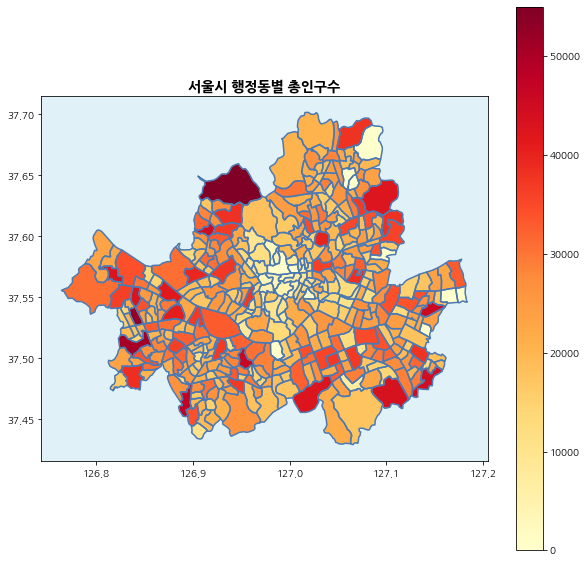

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def 지오데이터_불러오기(geojson_file):
    return gpd.read_file(geojson_file)

def 서울데이터_선택(geo_data):
    return geo_data[geo_data['sidonm'] == '서울특별시']

def 동별_그룹화(geo_data):
    return geo_data.dissolve(by='temp', aggfunc='sum')

def temp_열_복원(grouped_data):
    grouped_data['temp'] = grouped_data.index
    return grouped_data

def temp에서_구_제거(grouped_data):
    grouped_data['temp1'] = grouped_data['temp'].apply(lambda x: ' '.join(x.split()[1:]))
    return grouped_data

def 인구데이터_불러오기(csv_file):
    return pd.read_csv(csv_file, encoding='euc-kr')

def 데이터_병합(grouped_data, population_data):
    return grouped_data.merge(population_data, left_on='temp1', right_on='동', how='outer')

def 인구데이터_청소(merged_data):
    merged_data['총인구수'] = merged_data['총인구수'].fillna(0).astype(float)
    return merged_data

def 서울_인구_플롯(merged_data):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#E0F2F7')
    grouped_data.boundary.plot(ax=ax, color=None, edgecolor='#4D79B2', linewidth=1.5)
    merged_data.plot(ax=ax, column='총인구수', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)
    ax.set_title('서울시 행정동별 총인구수', fontdict={'fontsize': '14', 'fontweight': 'bold'})
    plt.show()

# 주 프로그램
def 주_프로그램():
    plt.rcParams['font.family'] = 'NanumGothic'
    
    geojson_file = 'HangJeongDong_ver20230401.geojson'
    geo_data = 지오데이터_불러오기(geojson_file)
    
    seoul_geo_data = 서울데이터_선택(geo_data)
    
    grouped_data = 동별_그룹화(seoul_geo_data)
    
    grouped_data = temp_열_복원(grouped_data)
    
    grouped_data = temp에서_구_제거(grouped_data)
    
    csv_file = '동인구수.csv'
    population_data = 인구데이터_불러오기(csv_file)
    
    merged_data = 데이터_병합(grouped_data, population_data)
    
    merged_data = 인구데이터_청소(merged_data)
    
    서울_인구_플롯(merged_data)

if __name__ == '__main__':
    주_프로그램()